# **Data** **Analysis**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("insurance.csv")

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#transform every data into numeric use shape method
data.shape


(1338, 7)

In [ ]:
print("row count of dataset {}".format(data.shape[0]))

row count of dataset 1338


In [ ]:
#watching all the info regarding to data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#watching if there is any null values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#creating summaries by using "describe" method
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#checking for duplicate entries
data.duplicated().sum()

1

In [ ]:
#removing the duplicated entry
data.drop_duplicates(inplace = True)

In [ ]:
#checking any duplicates left
data.duplicated().sum()

0

In [ ]:
#importing necessary libraries to make our data visual
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.value_counts('sex')

sex
male      675
female    662
dtype: int64

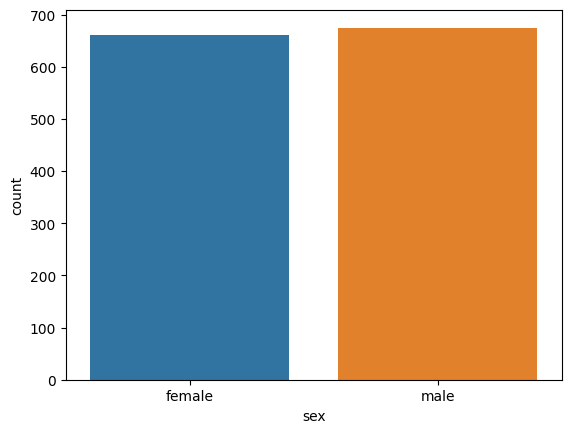

In [ ]:
sns.countplot(x = 'sex', data = data)
plt.show()

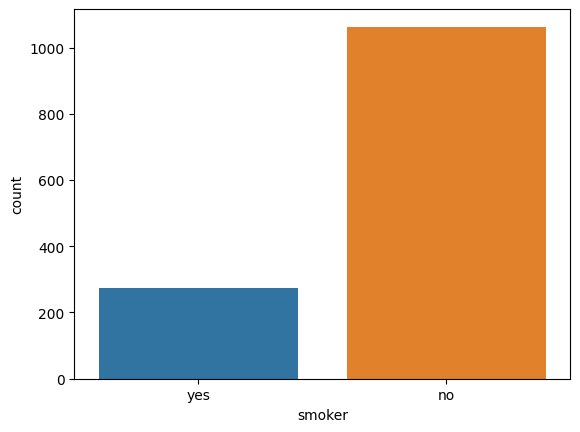

In [ ]:
sns.countplot(x = 'smoker', data = data)
plt.show()

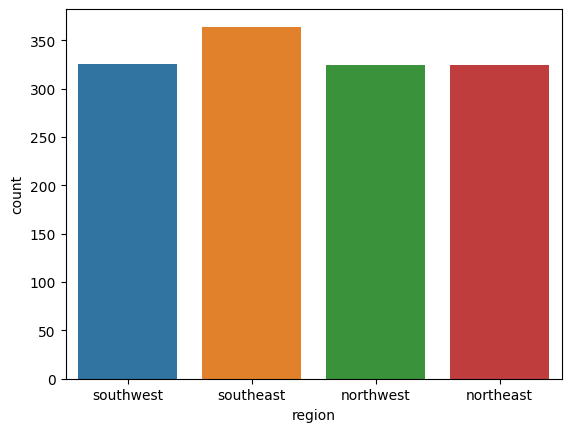

In [ ]:
sns.countplot(x = 'region', data = data)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data["smoker"] = labelencoder.fit_transform(data["smoker"])
data["sex"] = labelencoder.fit_transform(data["sex"])
data["region"] = labelencoder.fit_transform(data["region"])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
data.corr()["charges"].sort_values(ascending = False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

<Axes: >

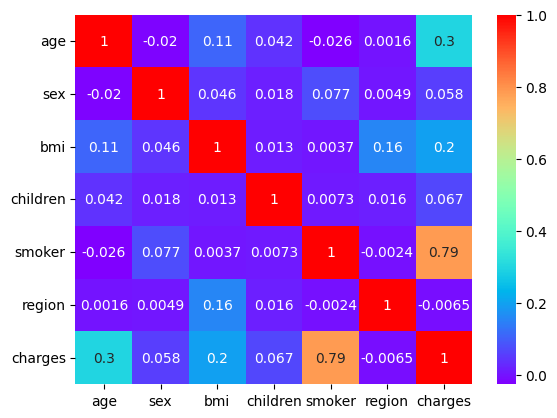

In [ ]:
#creating heatmap using seaborn
sns.heatmap(data.corr(), annot = True, cmap = "rainbow")

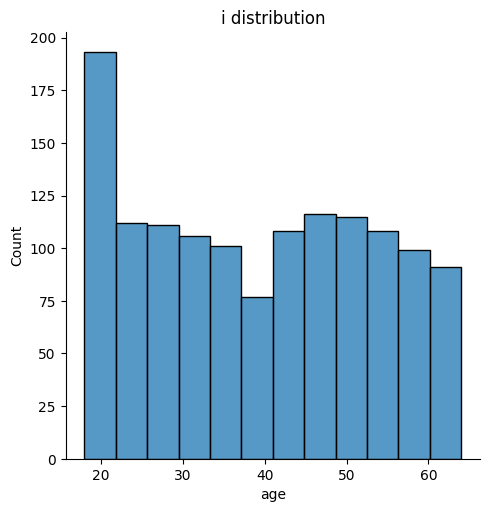

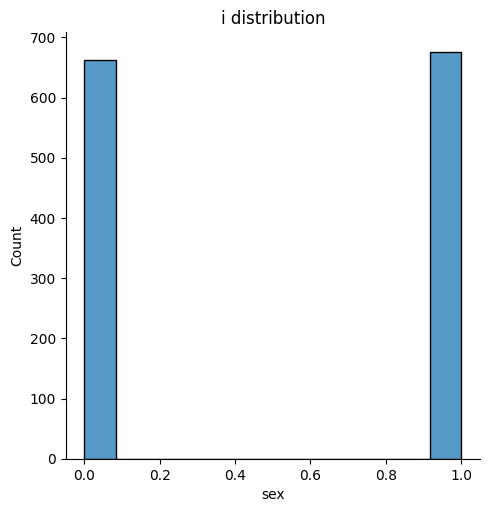

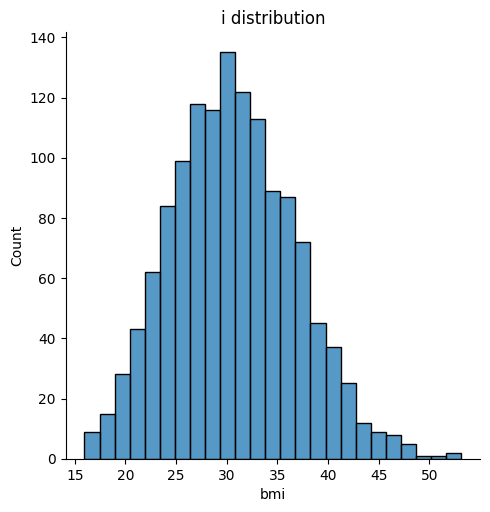

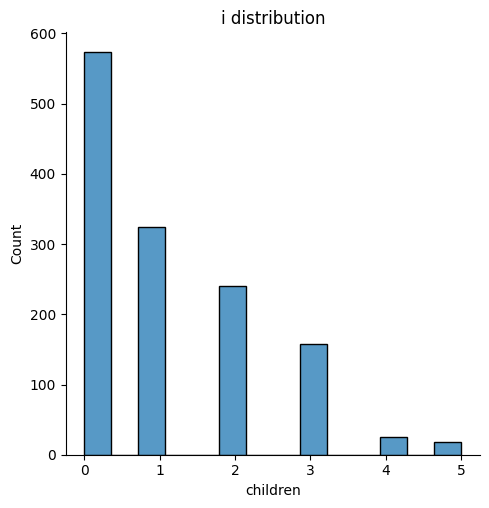

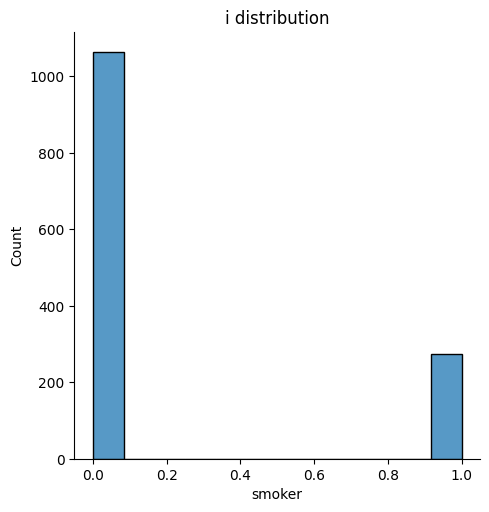

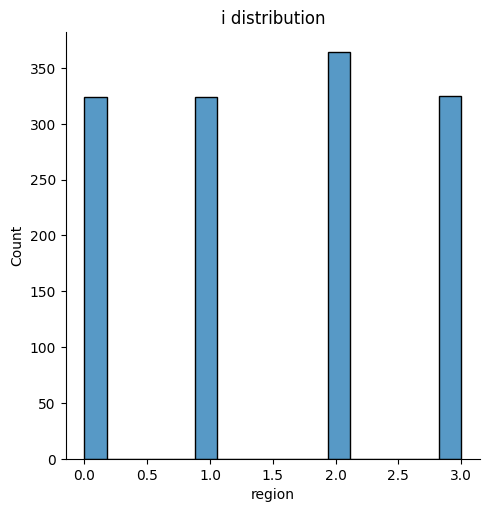

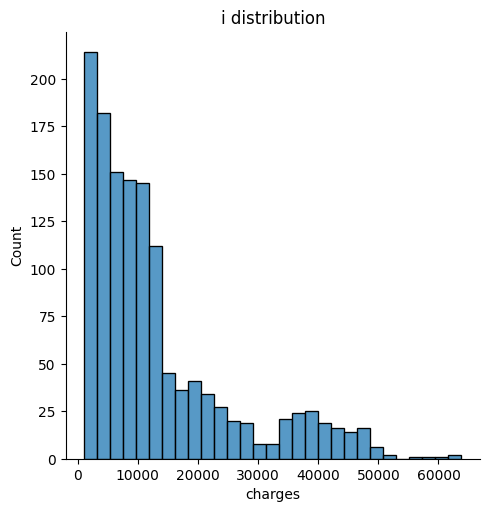

In [ ]:
#creating distribution plot
for i in data.columns:
  sns.displot(data[i])
  plt.title("i" + " " + "distribution")
  plt.show()

In [ ]:
colorsforx = ["Violet","Blue","Green","Yellow","Red","Black"]
colorchanger = 0

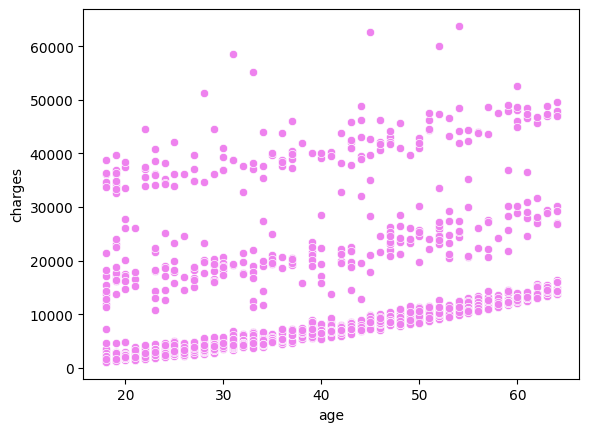

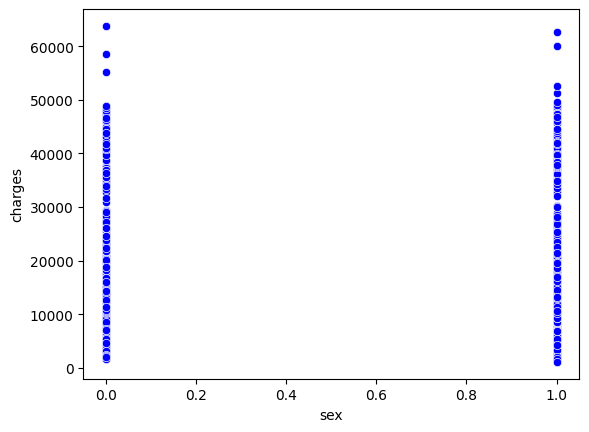

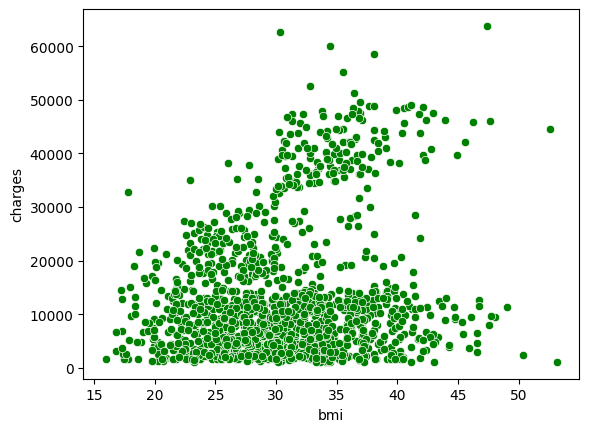

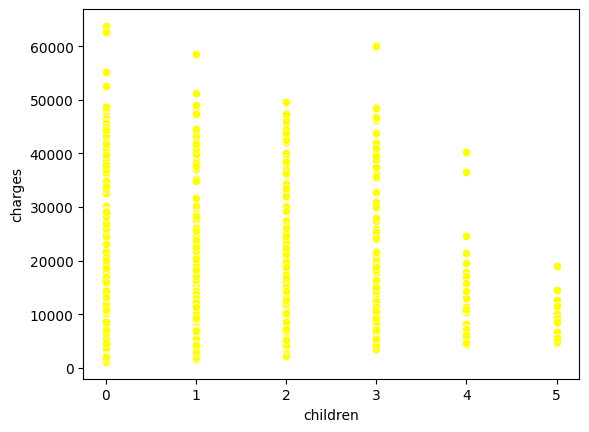

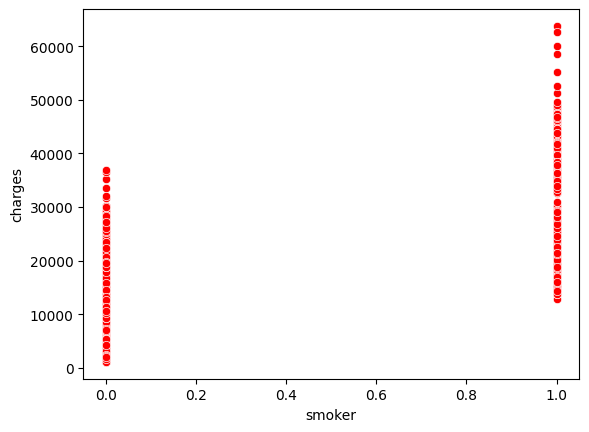

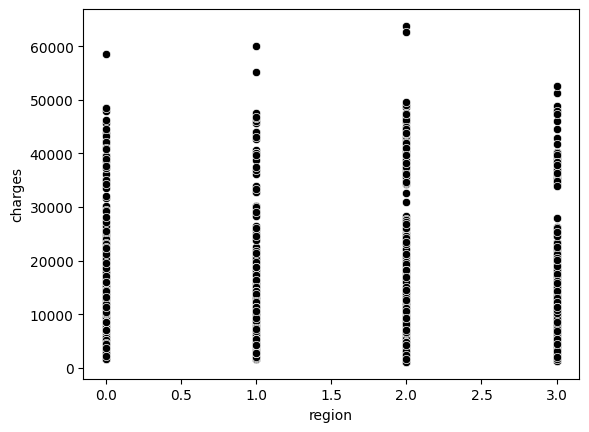

In [ ]:
#creating a scatter plot
for i in data.columns[:-1]:
  sns.scatterplot(data = data, x = i, y = "charges", color = colorsforx[colorchanger])
  plt.show()
  colorchanger = colorchanger + 1

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# **Machine** **Learning**

In [ ]:
import numpy as np
from sklearn import preprocessing

In [ ]:
x = data[["age","sex","bmi","children","smoker","region"]]
y = data["charges"]

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_test = scaler.fit_transform(x_test)
scaled_x_train = scaler.fit_transform(x_train)

In [ ]:
#mean absloute error & root mean squared error
from sklearn.metrics import mean_absolute_error, mean_squared_error
def modelresults(predictions):
  print("Mean Absolute Error on model is {}".format(mean_absolute_error(y_test, predictions)))
  print("Root Mean Squared Error on model is {}".format(np.sqrt(mean_squared_error(y_test, predictions))))

In [ ]:
#trainig our model with linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_x_train, y_train)

LinearRegression()

In [ ]:
#predictions and passing them into defined function
predsclr = lr.predict(scaled_x_test)
modelresults(predsclr)

Mean Absolute Error on model is 4110.3059800098135
Root Mean Squared Error on model is 5941.365684573032


In [ ]:
#training support vector model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svrmodel = SVR()
param_gridsvr = {'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4,5]}
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(scaled_x_train,y_train)
print("Best parameters for model is {}",format(gridsvr.best_params_))

Best parameters for model is {} {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
#performance of our model
pregridsvr = gridsvr.predict(scaled_x_test)
modelresults(pregridsvr)

Mean Absolute Error on model is 7602.248731077012
Root Mean Squared Error on model is 11897.088049343929


In [ ]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
#avg sum of all elements in dataframe
columniterate = 1
for index in x.columns:
  mean = data[index].mean()
  print("The mean of the column {} is {}".format(columniterate , mean))
  columniterate = columniterate + 1

The mean of the column 1 is 39.222139117427076
The mean of the column 2 is 0.5048616305160808
The mean of the column 3 is 30.66345175766642
The mean of the column 4 is 1.0957367240089753
The mean of the column 5 is 0.2049364248317128
The mean of the column 6 is 1.5160807778608825


In [ ]:
#creating a numpy array
new_customer = np.array([39,0,30,1,0,1])

In [ ]:
#predict insurance charge
new_cust_result = gridsvr.predict(new_customer.reshape(1, -1))

In [ ]:
print("the insurance cost of the new customer is {}".format(new_cust_result[0]))

the insurance cost of the new customer is 29266.731575800208
